In [1]:
#import libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
file_path = os.path.join(os.getcwd(),'data_sets/A34 Comparison Dataset.xlsx')

In [3]:
file_path

'/Users/oluyemijegede/DSProjects/TfWM/error_correction/data_sets/A34 Comparison Dataset.xlsx'

In [4]:
df = pd.read_excel(file_path, sheet_name='Tableau')

In [5]:
df = df[['TimeDate','ANPR','ATC']]

In [6]:
df.describe()

,ANPR,ATC
count,4032.000000,4032.000000
mean,107.444940,126.532490
std,82.013274,94.931821
min,0.000000,1.000000
25%,22.000000,27.000000
50%,106.500000,128.000000
75%,176.000000,207.250000
max,325.000000,377.000000


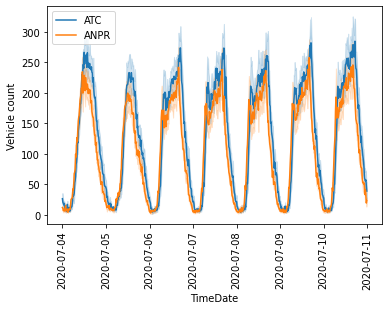

In [7]:
#plt.figure(1)
#How do the two measurments compare on a plot?
sns.lineplot(data=df, x='TimeDate', y='ATC')
sns.lineplot(data=df, x='TimeDate', y='ANPR')
plt.legend(['ATC','ANPR'])
plt.ylabel('Vehicle count')
plt.xticks(rotation=90);

In [66]:
df['Hour'] = df['TimeDate'].dt.hour
df['GAP'] = df['ATC'] - df['ANPR']

Histogram for ATC


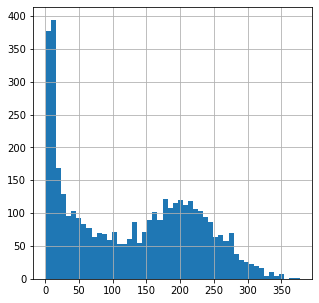

Histogram for ANPR


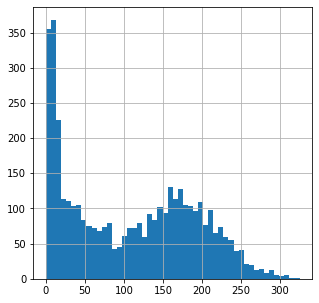

Histogram for GAP


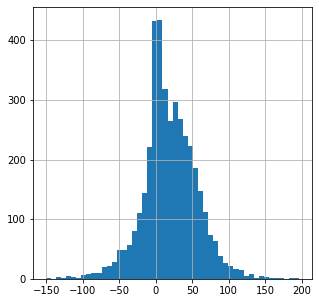

In [67]:
for i in ['ATC','ANPR','GAP']:
    print('Histogram for '+ i )
    df[i].hist(bins=50,figsize=(5,5))
    plt.show()

Split train, test

In [92]:
train_set, test_set = train_test_split(df, test_size =0.2, random_state=42)

In [93]:
df_train = train_set

In [94]:
df_train_labels = df_train['ATC']
df_train_feat = df_train[['ANPR','Hour']]

In [95]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3225 entries, 1164 to 3174
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   TimeDate  3225 non-null   datetime64[ns]
 1   ANPR      3225 non-null   int64         
 2   ATC       3225 non-null   int64         
 3   Hour      3225 non-null   int64         
 4   GAP       3225 non-null   int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 151.2 KB


In [96]:
corr_matrix = df_train[['ATC','ANPR','Hour','GAP']].corr()

In [97]:
corr_matrix

,ATC,ANPR,Hour,GAP
ATC,1.000000,0.923513,0.377848,0.526858
ANPR,0.923513,1.000000,0.207744,0.160546
Hour,0.377848,0.207744,1.000000,0.511966
GAP,0.526858,0.160546,0.511966,1.000000


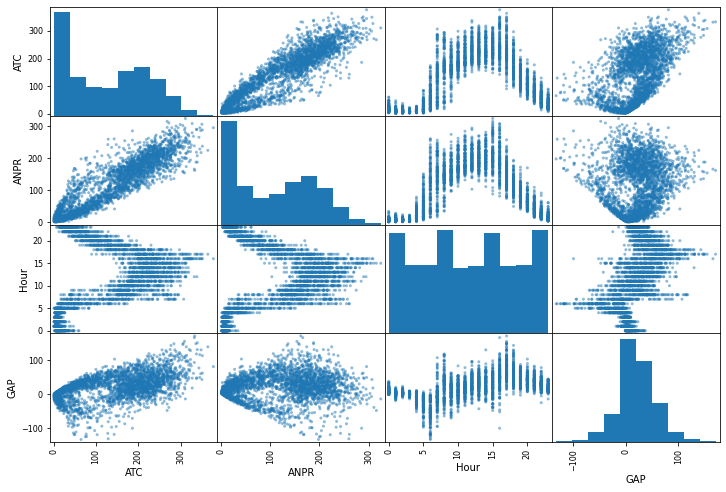

In [98]:
pd.plotting.scatter_matrix(df_train[['ATC','ANPR','Hour','GAP']], figsize=(12,8));

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [100]:
pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [101]:
df_tr = pipeline.fit_transform(df_train_feat)

In [102]:
df_tr

array([[-1.26601123, -1.22605955],
       [ 0.8950406 ,  0.35780348],
       [-0.09391532,  1.07774122],
       ...,
       [-1.03403392,  1.65369141],
       [ 1.48108856,  0.06982838],
       [-1.26601123, -1.51403465]])

In [103]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [104]:
lin_reg.fit(df_tr, df_train_labels)

LinearRegression()

In [105]:
import numpy as np
from sklearn.metrics import mean_squared_error
atc_pred = lin_reg.predict(df_tr)
lin_mse = mean_squared_error(df_train_labels, atc_pred)
lin_rmse =np.sqrt(lin_mse)

In [106]:
lin_rmse

31.684463753706304

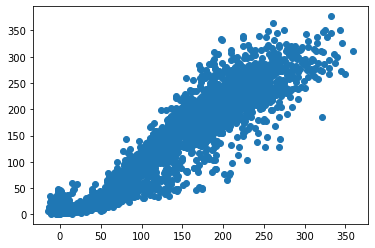

In [111]:
plt.plot(pd.DataFrame(atc_pred), df_train_labels, marker='o', linestyle='None')

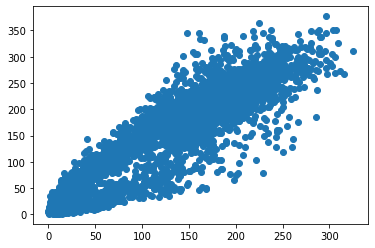

In [117]:
plt.plot(df['ANPR'], df['ATC'], marker='o', linestyle='None')

In [113]:
lin_reg.intercept_

125.92093023255813

In [115]:
lin_reg.coef_

array([83.99778583, 18.48840791])

In [ ]:
84ANPR + 18*Hour mark + 126 = ATC